In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
import catboost
import itertools
import pickle
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix


In [8]:
df=pd.read_csv('train.csv')
y=df['ACTION']
X=df.drop(["ACTION"], axis=1)
#cat_features = list(range(0, X.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model_names = ["Catboost3", "Catboost_w", "Catboost",]

for model_name in model_names:
    with open(f"{model_name}", "rb") as pfile:
        exec(f"{model_name} = pickle.load(pfile)")

        
model_list = list((model_names))

In [10]:
print(model_list)

['Catboost3', 'Catboost_w', 'Catboost']


In [11]:
X_test.shape[0]

6554

In [12]:
X_test.iloc[0].values

array([ 37793,  81744, 117902, 117903, 118783, 118451, 130134, 118453,
       118454])

In [13]:
Catboost3.predict_proba(X_test.iloc[[2]])[:,1]

array([0.98244626])

In [14]:
X_test.iloc[[2]]

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
27195,27356,205,117961,118386,118746,118784,147114,290919,118786


In [15]:
X_train.iloc[0].values

array([ 34950,   8433, 117961, 118327, 118929, 118321, 117906, 290919,
       118322])

In [16]:
def voting_classifer(X):
    score=[]
    result=[]
    i=0
    for i in range(X.shape[0]):  
        A=Catboost3.predict_proba(X.iloc[[i]])[:,1]
        B=Catboost_w.predict_proba(X.iloc[[i]])[:,1]
        C=Catboost.predict_proba(X.iloc[[i]])[:,1]
        score=(A+B+C)/3
        result.append(score)
        i=+1

    return result
    
        


In [17]:
def voting_classifer_r(X):
    score=[]
    result=[]
    i=0
    for i in range(X.shape[0]):  
        A=Catboost3.predict_proba(X_test.iloc[[i]])[:,1]
        B=Catboost_w.predict_proba(X.iloc[[i]])[:,1]
        C=Catboost.predict_proba(X.iloc[[i]])[:,1]
        
        score=np.round_((A+B+C)/3)
        
        result.append(score)
        i=+1

    return result


In [18]:
confusion_matrix(y_test,voting_classifer_r(X_test))

array([[  86,  283],
       [  27, 6158]])

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
print("ROC AUC score = ", roc_auc_score(y_test,voting_classifer(X_test)))

ROC AUC score =  0.8977443460772523


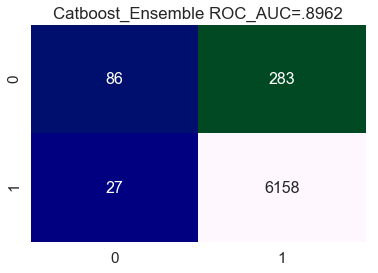

In [20]:
array = confusion_matrix(y_test,voting_classifer_r(X_test))
            
df_cm = pd.DataFrame(array,index = ["0",'1'],
                  columns = ['0','1'])
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sns_plot = sn.heatmap(df_cm, annot=True,
           annot_kws={"size": 16},
           cmap='gist_ncar', 
           fmt='g', 
           cbar=False).set_title("Catboost_Ensemble ROC_AUC=.8962")# font size

In [21]:
fig = sns_plot.get_figure()
fig.savefig("Catboos.png")

In [ ]:
print(int(np.max(voting_classifer_r(X_test.iloc[[0]]))))

In [ ]:
CATEGORIES = ["Rejected", "Approved"]

In [ ]:
print(CATEGORIES[1])

In [ ]:
response = (CATEGORIES[(int(np.max(voting_classifer_r(X_test.iloc[[0]]))))])

In [ ]:
print(response)